# Modeling COVID-19 epidemic with Python - Regional Breakdown
 

In [196]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn.metrics import max_error
import math
import numpy as np
from sklearn import linear_model

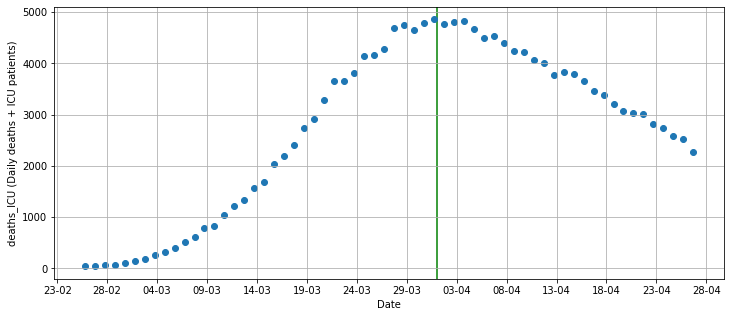

In [197]:
##why we start considering the trend after April 1st
data = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
data['diff_deceduti'] = data['deceduti'].diff()
dates = data['data']
data['deaths_ICU'] = data['diff_deceduti'] + data['terapia_intensiva']
variable = 'deaths_ICU'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
date_format = [pd.to_datetime(d) for d in dates]
ax.scatter(date_format,data[variable])
ax.set(xlabel="Date",ylabel='deaths_ICU (Daily deaths + ICU patients)')#,title="Trend of daily deaths +")
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
ax.axvline(datetime(2020, 4, 1), c="green", zorder=0)
fig.savefig(variable + '.png')
plt.show()

In [198]:
#data for Trentino Alto Adige is split into 2 cateorgires (province of Bolzano and province of Trento), given their autonomous status
#they have different 'region name' but the same 'region code'
#it is an anomaly, and this unconsistency needs to be fixed in order to be mapped correctly.
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")
print(df.columns)

df_no_04 = df[df.codice_regione != 4]
df_only_04 = df[df.codice_regione == 4]
df_only_04_sum = df_only_04.groupby(['data'], as_index=False)[["terapia_intensiva", "deceduti"]].sum()
df_only_04_sum['denominazione_regione'] = 'Trentino Alto Adige'
df_only_04_sum['codice_regione'] = 4
df_clean = df_no_04.append(df_only_04_sum)


Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat', 'long', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it', 'note_en'], dtype='object')


In [199]:
def n_to_date(n):
    # it converts a number to a date, considering starting from peak_date_integer
    return (peak_date_dateformat + timedelta(days=n - peak_date_integer)).strftime('%d/%m/%Y')
def build_line(x1, y1, x2, y2):
    m = float(y2 - y1) / (x2 - x1)
    q = y1 - (m * x1)
    return [m, q]

In [200]:
def calculate_date_zero(linear_regr):
    date_zero_integer = round(- linear_regr.intercept_ / linear_regr.coef_[0])
    date_zero_datetime = n_to_date(date_zero_integer)
    today = datetime.today()
    future = peak_date_dateformat + timedelta(days=date_zero_integer - peak_date_integer)
    remaining_days = (future - today).days
    line_max = build_line(X_test[0][0], y_pred_max[0], X_test[1][0], y_pred_max[1])
    date_zero_max = math.ceil(- line_max[1] / line_max[0])
    date_zero_max = n_to_date(date_zero_max)
    line_min = build_line(X_test[0][0], y_pred_min[0], X_test[1][0], y_pred_min[1])
    date_zero_min = math.floor(- line_min[1] / line_min[0])
    date_zero_min = n_to_date(date_zero_min)
    return date_zero_datetime, date_zero_max, date_zero_min, remaining_days

In [201]:
rolling_average_days = 7

In [202]:
##creating a model for each region and store the results in a dataframe (model score, days remaining to date zero, 
#date min and date max)
regional_df_list = []
for region, data_region_subset in df_clean.groupby('denominazione_regione'):
    data_region = data_region_subset.copy()
    data_region['diff_deceduti'] = data_region['deceduti'].diff().rolling(window=rolling_average_days).mean()
    data_region['deaths_ICU'] = data_region['diff_deceduti'] + data_region['terapia_intensiva']
    regional_df_list.append(data_region)

In [203]:
model_outputs_df = pd.DataFrame()

Creating model for Abruzzo
Score : 0.983669255864808


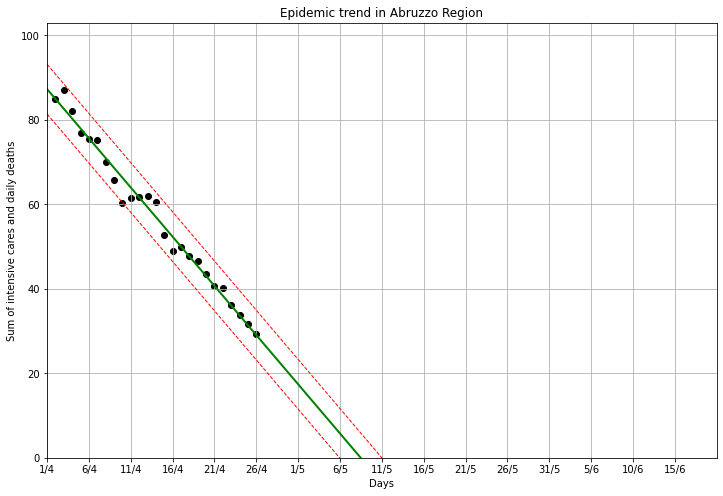

Abruzzo Zero intensive cares and deaths expected between 11/05/2020 and 05/05/2020
Creating model for Basilicata
Score : 0.9507590713060535


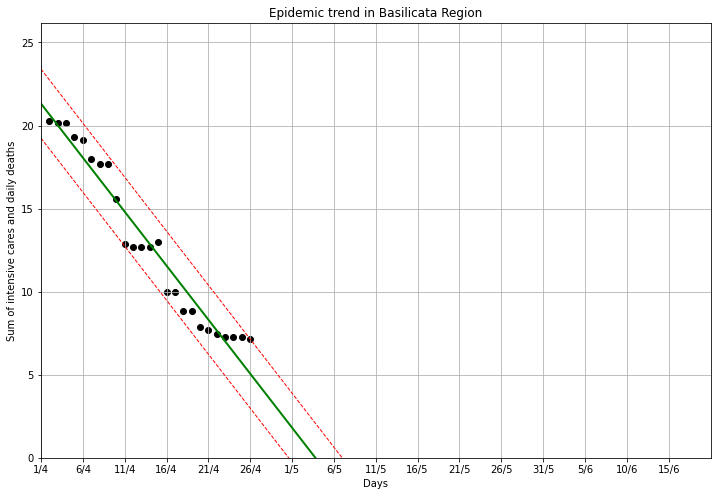

Basilicata Zero intensive cares and deaths expected between 07/05/2020 and 30/04/2020
Creating model for Calabria
Score : 0.8991450441156491


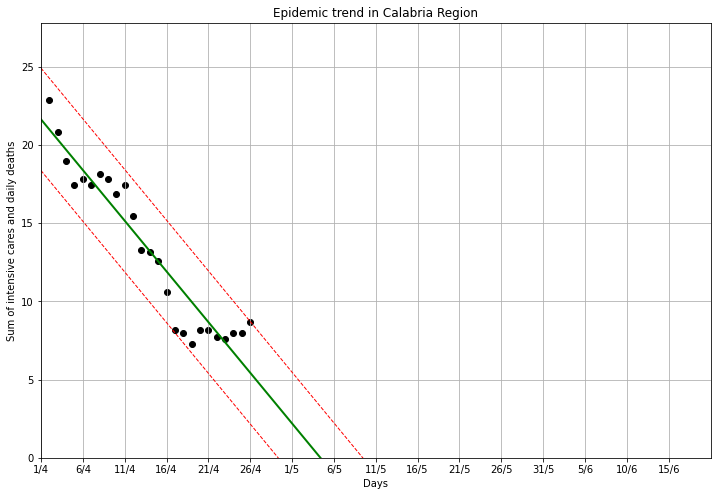

Calabria Zero intensive cares and deaths expected between 10/05/2020 and 29/04/2020
Creating model for Campania
Score : 0.9632873922021352


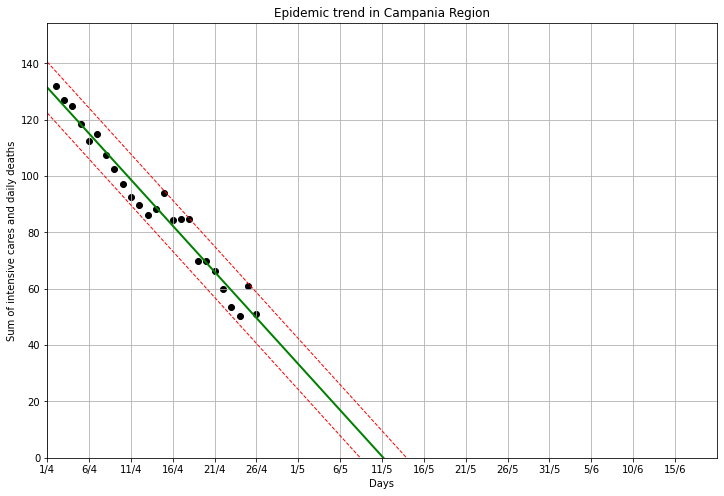

Campania Zero intensive cares and deaths expected between 14/05/2020 and 08/05/2020
Creating model for Emilia-Romagna
Score : 0.9686228113264405


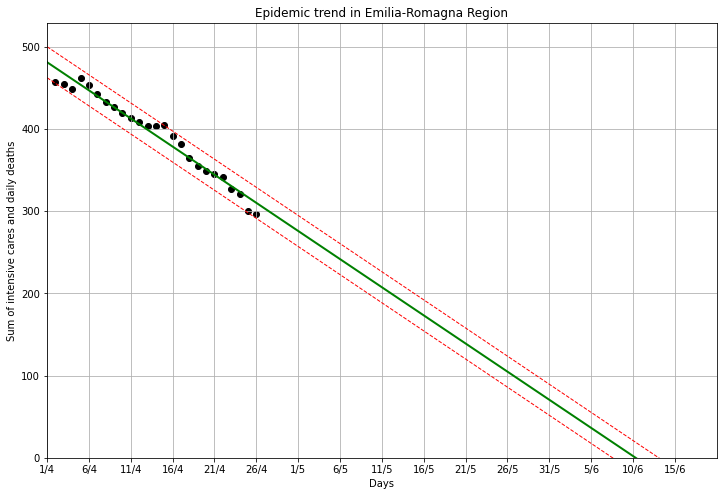

Emilia-Romagna Zero intensive cares and deaths expected between 14/06/2020 and 07/06/2020
Creating model for Friuli Venezia Giulia
Score : 0.897290181764567


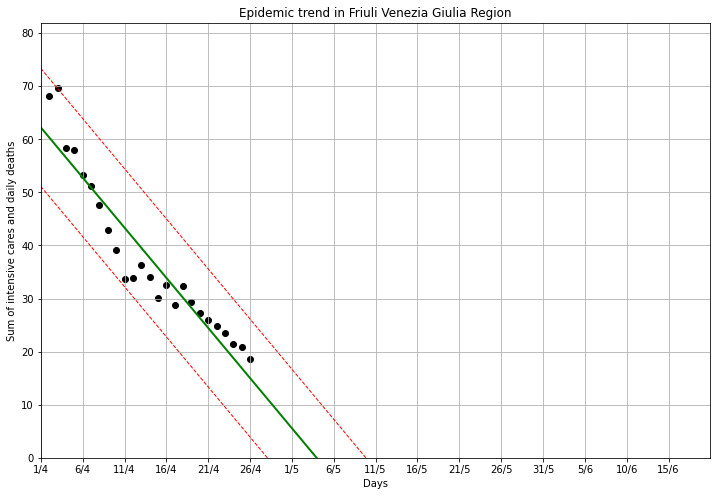

Friuli Venezia Giulia Zero intensive cares and deaths expected between 10/05/2020 and 28/04/2020
Creating model for Lazio
Score : 0.4078487316630822


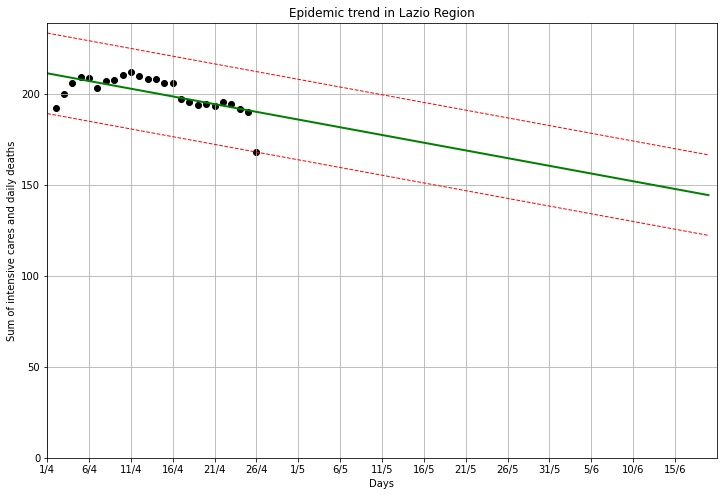

Lazio Zero intensive cares and deaths expected between 02/01/2021 and 10/11/2020
Creating model for Liguria
Score : 0.9495044075715828


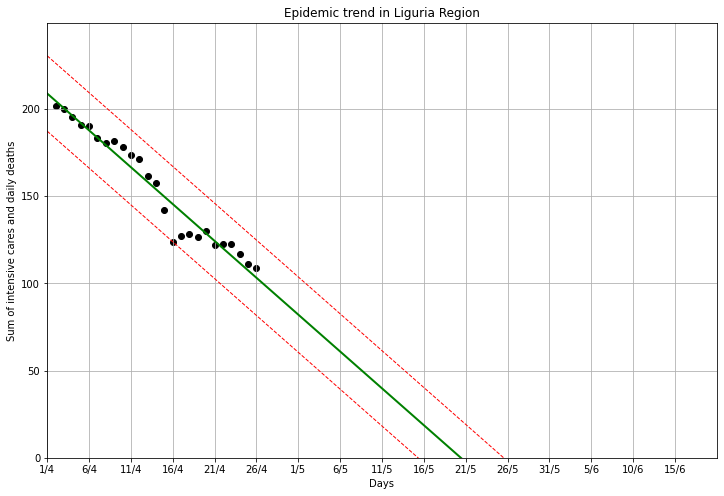

Liguria Zero intensive cares and deaths expected between 26/05/2020 and 15/05/2020
Creating model for Lombardia
Score : 0.9975386305153009


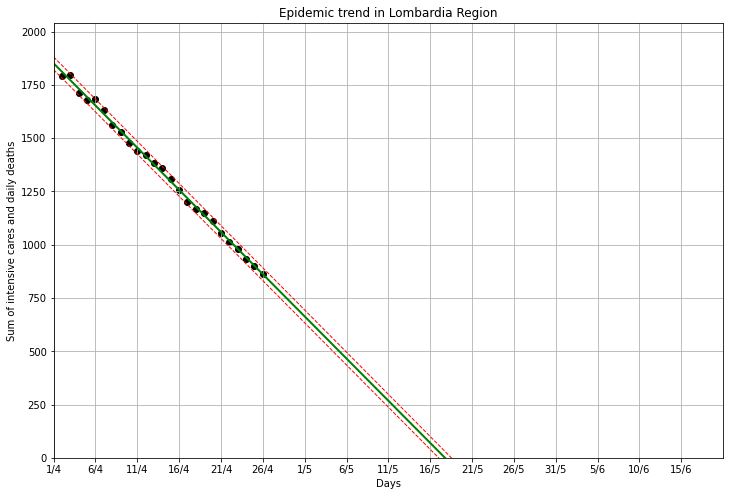

Lombardia Zero intensive cares and deaths expected between 19/05/2020 and 17/05/2020
Creating model for Marche
Score : 0.9861202257593434


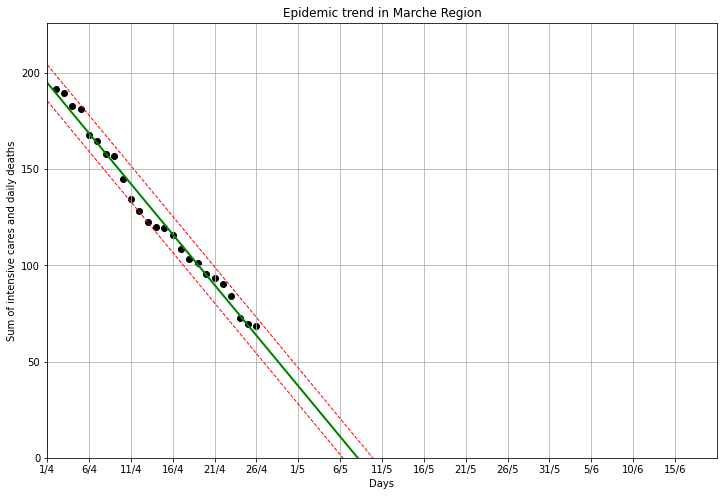

Marche Zero intensive cares and deaths expected between 10/05/2020 and 06/05/2020
Creating model for Molise
Score : 0.8455328921301386


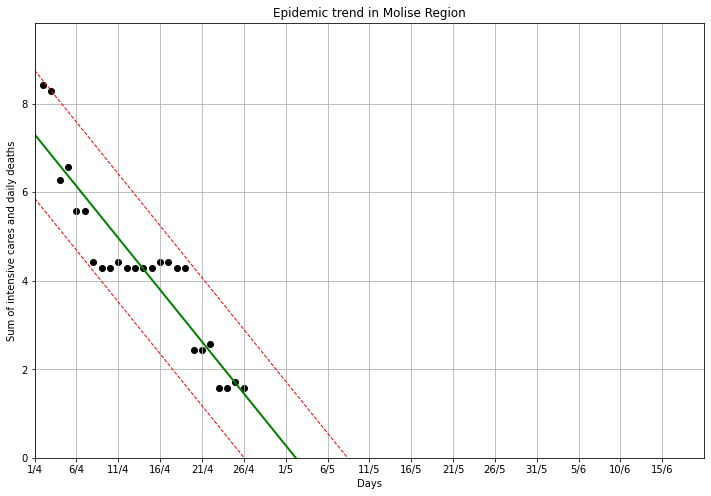

Molise Zero intensive cares and deaths expected between 09/05/2020 and 26/04/2020
Creating model for Piemonte
Score : 0.9531894701717197


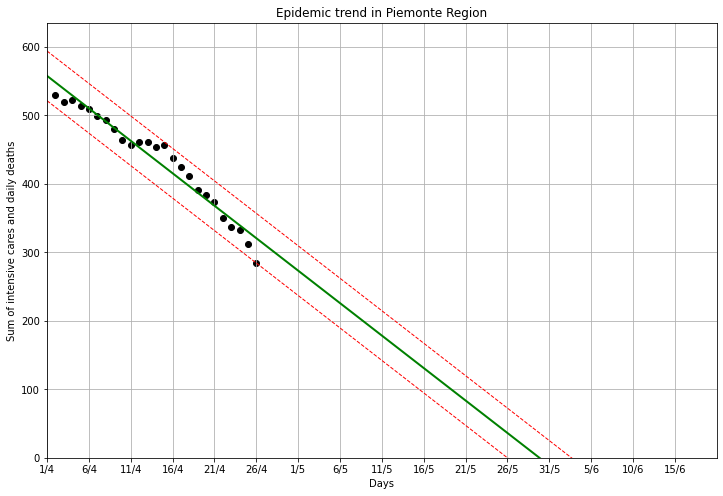

Piemonte Zero intensive cares and deaths expected between 03/06/2020 and 25/05/2020
Creating model for Puglia
Score : 0.7193035116166437


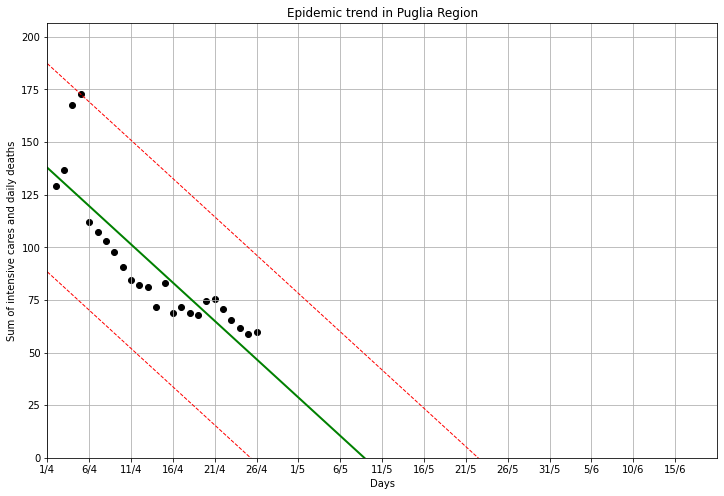

Puglia Zero intensive cares and deaths expected between 23/05/2020 and 25/04/2020
Creating model for Sardegna
Score : 0.5041257047074481


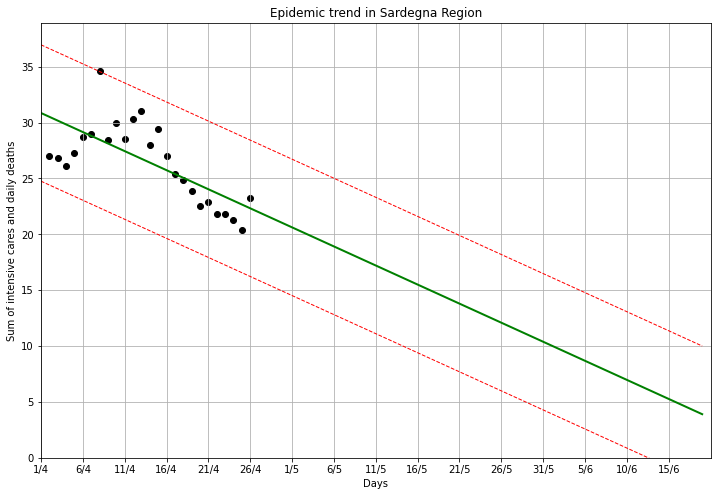

Sardegna Zero intensive cares and deaths expected between 19/07/2020 and 12/06/2020
Creating model for Sicilia
Score : 0.9764668581992016


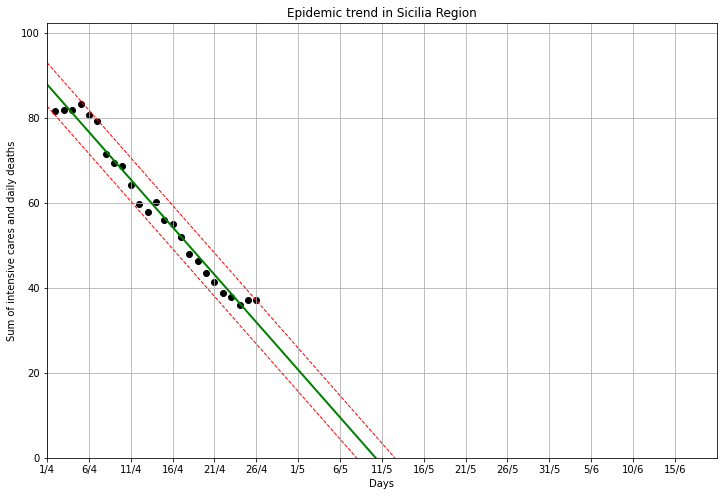

Sicilia Zero intensive cares and deaths expected between 13/05/2020 and 07/05/2020
Creating model for Toscana
Score : 0.985885762866495


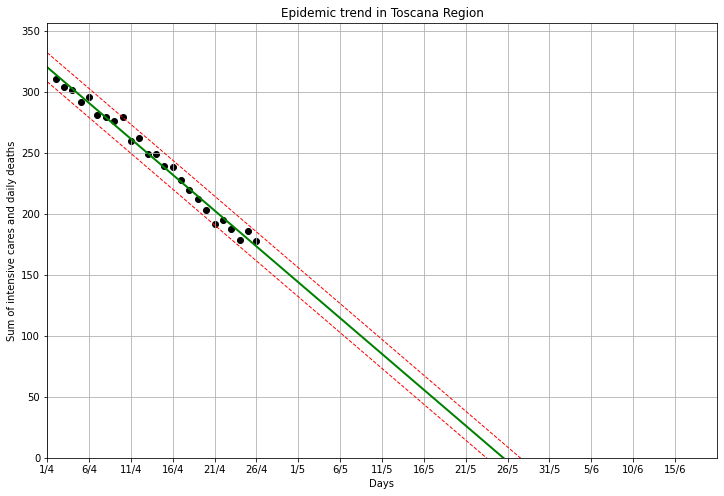

Toscana Zero intensive cares and deaths expected between 28/05/2020 and 23/05/2020
Creating model for Trentino Alto Adige
Score : 0.9636053342768119


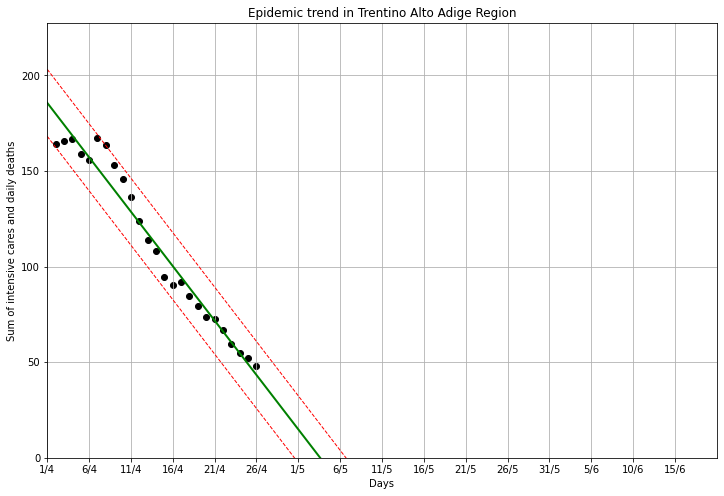

Trentino Alto Adige Zero intensive cares and deaths expected between 07/05/2020 and 30/04/2020
Creating model for Umbria
Score : 0.9544947125295166


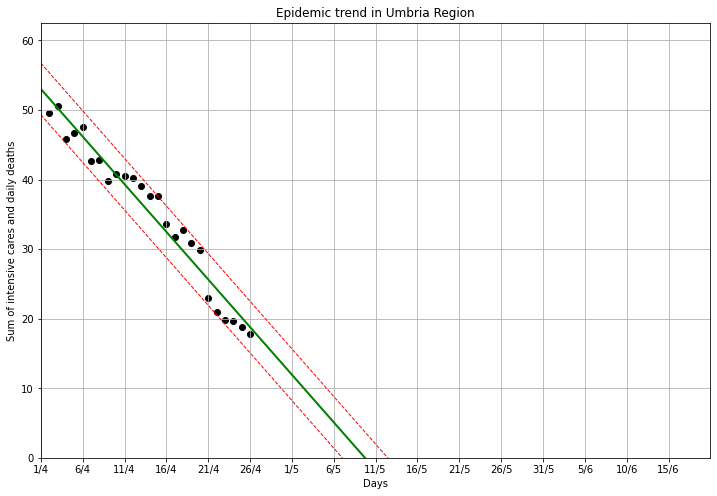

Umbria Zero intensive cares and deaths expected between 13/05/2020 and 07/05/2020
Creating model for Valle d'Aosta
Score : 0.962284500909581


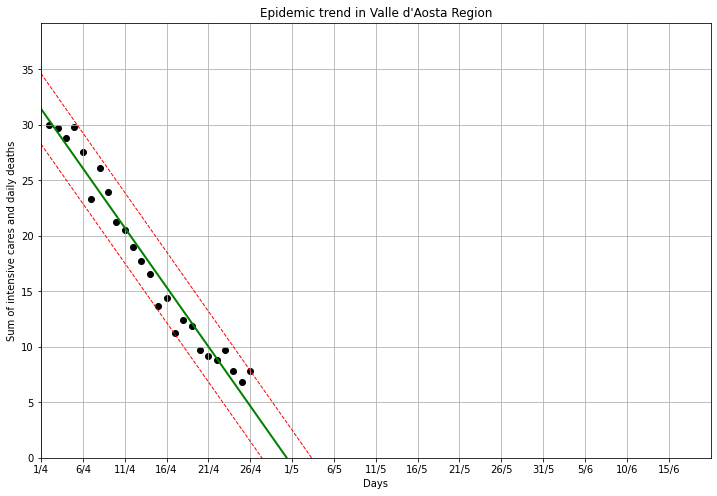

Valle d'Aosta Zero intensive cares and deaths expected between 04/05/2020 and 27/04/2020
Creating model for Veneto
Score : 0.9881279439539062


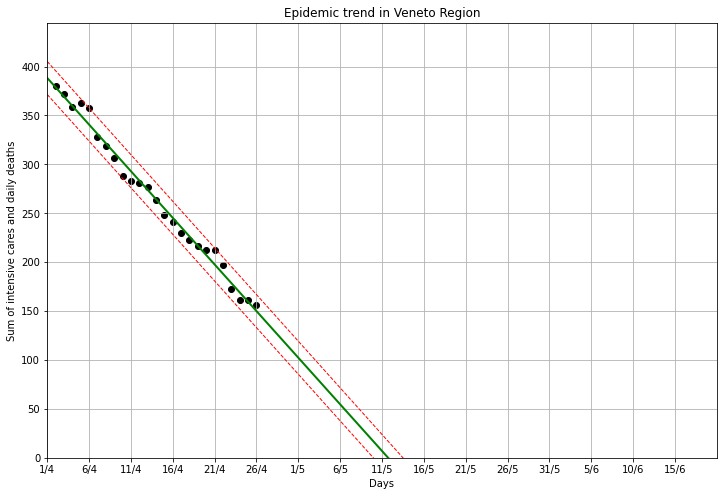

Veneto Zero intensive cares and deaths expected between 14/05/2020 and 09/05/2020


In [204]:
#user should be able to modify this value
model_score_threshold = 0.85
model_outputs_df = pd.DataFrame()
for data in regional_df_list:
    date = data['data']
    region_name = data["denominazione_regione"].iloc[0]
    region_code = data["codice_regione"].iloc[0]
    print("Creating model for " + region_name)
    date_format = [pd.to_datetime(d) for d in date]
    # Creating Linear Regression Model
    linear_regr = linear_model.LinearRegression()
    # Preparing the lists with past data, that we will use for training the model
    X = date_format
    y = data['deaths_ICU'].tolist()[1:]
    # date format is not suitable for modeling, let's transform the date into incrementals number starting from April 1st
    peak_date_integer = 37  # April 1st is the 37th day of the series
    day_numbers = []
    for i in range(1, len(X)):
        day_numbers.append([i])
    X = day_numbers
    # Extracting data after the peak, that we will use for training the model
    X = X[peak_date_integer:]
    y = y[peak_date_integer:]
    # Train the model using the training sets
    linear_regr.fit(X, y)
    model_score = linear_regr.score(X, y)
    print("Score : %s" % (model_score))

    # Predict future trend
    y_pred = linear_regr.predict(X)
    error = max_error(y, y_pred)
    error
    X_test = []
    future_days = 80
    for i in range(peak_date_integer, peak_date_integer + future_days):
        X_test.append([i])
    y_pred_linear = linear_regr.predict(X_test)
    y_pred_max = []
    y_pred_min = []
    for i in range(0, len(y_pred_linear)):
        y_pred_max.append(y_pred_linear[i] + error)
        y_pred_min.append(y_pred_linear[i] - error)

    # convert date 0 into datetime format
    peak_date_dateformat = datetime.strptime(data['data'].iloc[peak_date_integer], '%Y-%m-%dT%H:%M:%S')
    # date forecast
    date_prev = []
    x_ticks = []
    step = 5
    data_curr = peak_date_dateformat
    x_current = peak_date_integer
    n = int(future_days / step)
    for i in range(0, n):
        date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
        x_ticks.append(x_current)
        data_curr = data_curr + timedelta(days=step)
        x_current = x_current + step

    if model_score >= model_score_threshold: 
        plt.title("Epidemic trend in %s Region" % region_name)
        # adjust plot size
        F = plt.gcf()
        Size = F.get_size_inches()
        F.set_size_inches(Size[0] * 2, Size[1] * 2, forward=True)
        # plot known data
        plt.scatter(X, y, color='black')
        # plot linear regression prediction
        plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
        # plot maximum error
        plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
        # plot minimum error
        plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
        plt.xlabel('Days')
        plt.xlim(peak_date_integer, peak_date_integer + future_days)
        plt.ylim(bottom=0)
        plt.xticks(x_ticks, date_prev)
        plt.ylabel('Sum of intensive cares and daily deaths')
        # plt.yscale("log")
        # add grid
        plt.grid()
        plt.savefig("prediction.png")
        plt.show()


    date_zero_datetime, date_zero_max, date_zero_min, remaining_days = calculate_date_zero(linear_regr)
    print("%s Zero intensive cares and deaths expected between %s and %s" % (region_name, date_zero_max, date_zero_min))

    temp = pd.DataFrame(
        {
            'region_name': region_name,
            'COD_REG': int(region_code),
            'remaining_days': remaining_days,
            'date_zero': date_zero_datetime,
            'date_zero_max': date_zero_max,
            'date_zero_min': date_zero_max,
            'model_score': model_score
        }, index=[region_code]
    )

    model_outputs_df = pd.concat([model_outputs_df, temp])

In [205]:
pd.set_option('display.width', 1000)
print(model_outputs_df)
#joining known latest data to regions
latest_regional_data = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-latest.csv")
df_no_04 = latest_regional_data[latest_regional_data.codice_regione != 4]
df_only_04 = latest_regional_data[latest_regional_data.codice_regione == 4]
df_only_04_sum = df_only_04.groupby(['data','lat','long','stato',], as_index=False)[["terapia_intensiva", "deceduti","ricoverati_con_sintomi","totale_ospedalizzati","isolamento_domiciliare","totale_positivi","variazione_totale_positivi",'nuovi_positivi','dimessi_guariti','totale_casi',"tamponi","casi_testati"]].sum()
df_only_04_sum['denominazione_regione'] = 'Trentino Alto Adige'
df_only_04_sum['codice_regione'] = 4
df_clean = df_no_04.append(df_only_04_sum)
df_clean['COD_REG'] = df_clean['codice_regione']


model_outputs_with_latest_data = model_outputs_df.merge(df_clean, on='COD_REG')



              region_name  COD_REG  remaining_days   date_zero date_zero_max date_zero_min  model_score
13                Abruzzo       13              11  08/05/2020    11/05/2020    11/05/2020     0.983669
17             Basilicata       17               7  04/05/2020    07/05/2020    07/05/2020     0.950759
18               Calabria       18               7  04/05/2020    10/05/2020    10/05/2020     0.899145
15               Campania       15              14  11/05/2020    14/05/2020    14/05/2020     0.963287
8          Emilia-Romagna        8              44  10/06/2020    14/06/2020    14/06/2020     0.968623
6   Friuli Venezia Giulia        6               7  04/05/2020    10/05/2020    10/05/2020     0.897290
12                  Lazio       12             223  06/12/2020    02/01/2021    02/01/2021     0.407849
7                 Liguria        7              23  20/05/2020    26/05/2020    26/05/2020     0.949504
3               Lombardia        3              21  18/05/2020  

In [206]:
#exporting dataframe to csv
today = datetime.today()
model_outputs_with_latest_data.to_csv('model_outputs_%s%02d%s.csv' % (today.year, today.month, today.day))

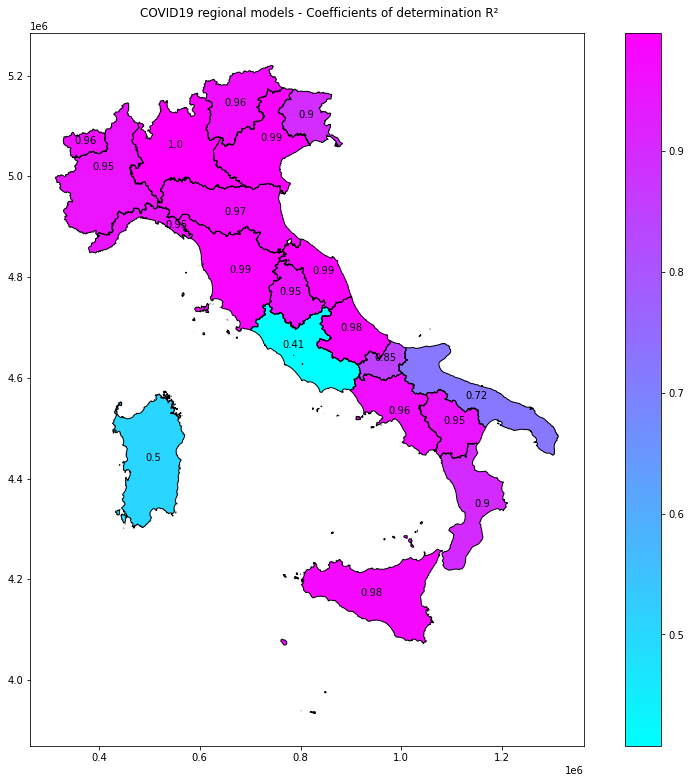

In [207]:
#importing mapping libraries
import geopandas as gpd
import os
#opening shapefile
df = gpd.read_file(os.path.join("/Users/andrea/Downloads/Limiti01012018_g 3/Reg01012018_g",'Reg01012018_g_WGS84.shp'))
#joining model outputs to the shapefile
#map settings
df = df.merge(model_outputs_df, on='COD_REG')
fig, ax = plt.subplots(figsize = (15,12))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional models - Coefficients of determination R²',fontsize = 12)
df.plot(column = 'model_score',cmap = 'cool',ax=ax, legend=True)
df.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) 
#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
for idx, row in df.iterrows():
    plt.annotate(s=str(round(row['model_score'],2)), xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_model_scores_map.png")

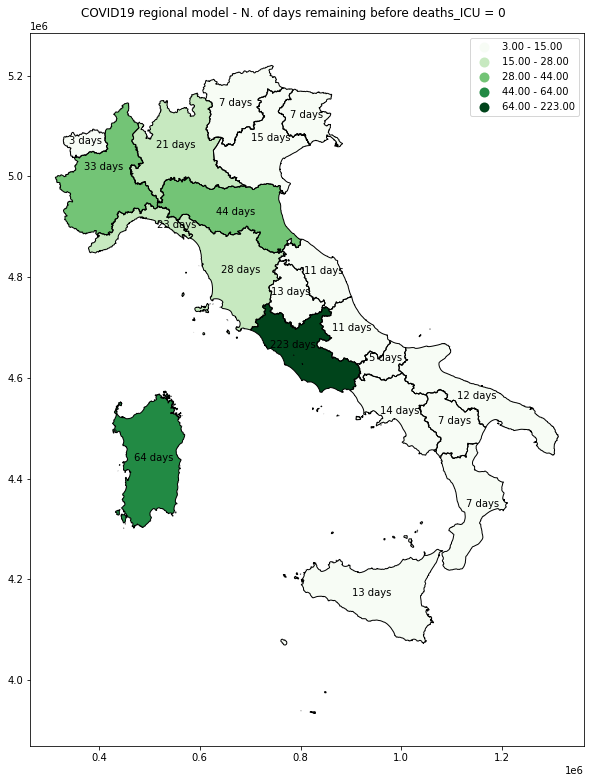

In [208]:
#opening shapefile
df = gpd.read_file(os.path.join("/Users/andrea/Downloads/Limiti01012018_g 3/Reg01012018_g",'Reg01012018_g_WGS84.shp'))
#joining model outputs to the shapefile
#map settings
df = df.merge(model_outputs_df, on='COD_REG')
fig, ax = plt.subplots(figsize = (15,12))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)
df.plot(column = 'remaining_days',cmap = 'Greens',ax=ax, legend=True, scheme='FisherJenks')
df.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) 
#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_regional_models_map_nofilter.png")

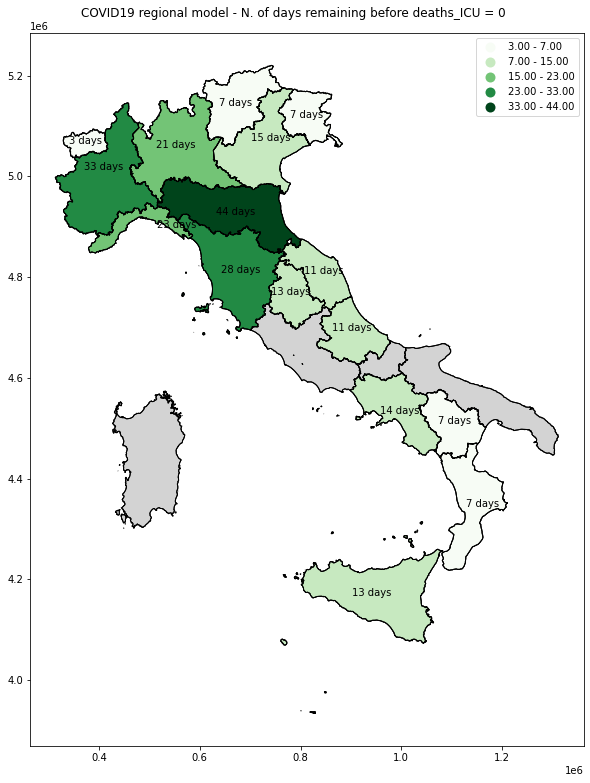

In [209]:
#opening shapefile
df = gpd.read_file(os.path.join("/Users/andrea/Downloads/Limiti01012018_g 3/Reg01012018_g",'Reg01012018_g_WGS84.shp'))
background = df

model_outputs_df_filtered = model_outputs_df[model_outputs_df['model_score'] > model_score_threshold]

#joining model outputs to the shapefile
#map settings
df = df.merge(model_outputs_df_filtered, on='COD_REG')
fig, ax = plt.subplots(figsize = (15,12))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)

df.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) 
background.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) 
background.plot(color='lightgray',edgecolor='k',linewidth = 1,ax=ax, legend=True) 
df.plot(column = 'remaining_days',cmap = 'Greens',ax=ax, legend=True, scheme='FisherJenks')
#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')
    
plt.savefig("COVID_regional_models_map.png")

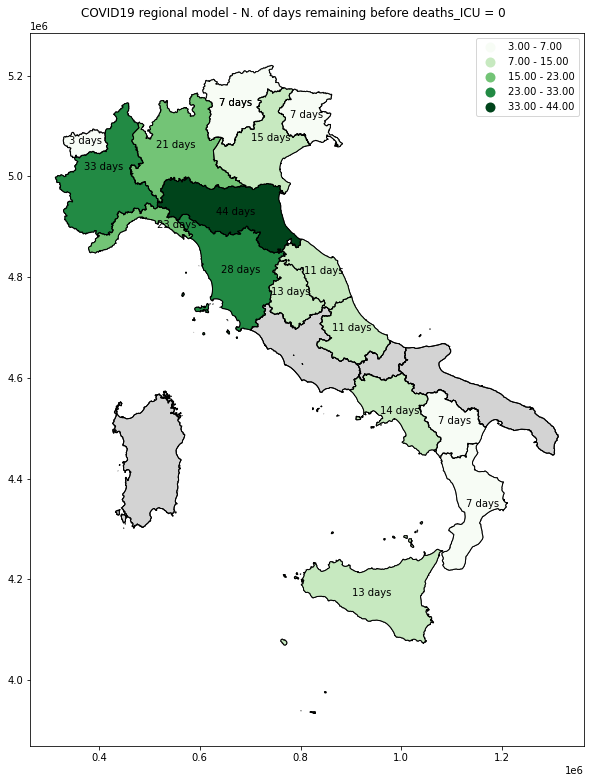

In [210]:
##mapping the results filtered - also with most recent data
import geopandas as gpd
import os
df = gpd.read_file(os.path.join("/Users/andrea/Downloads/Limiti01012018_g 3/Reg01012018_g",'Reg01012018_g_WGS84.shp'))
background = df
model_outputs_df_filtered = model_outputs_with_latest_data[model_outputs_with_latest_data['model_score'] > model_score_threshold]
df = df.merge(model_outputs_df_filtered, on='COD_REG')
fig, ax = plt.subplots(figsize = (15,12))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)
background.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) 
background.plot(color='lightgray',edgecolor='k',linewidth = 1,ax=ax, legend=True) 
df.plot(column = 'remaining_days',cmap = 'Greens',ax=ax, legend=True,scheme='FisherJenks')
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')

In [211]:
export_table = model_outputs_df.copy()
export_table.loc[export_table['model_score'] < model_score_threshold, 'remaining_days'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero_min'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero_max'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero'] = 'No Data'
export_table.sort_index(inplace=True)
del export_table['COD_REG']
print(export_table)
export_table.to_csv('export_table_%s%02d%s.csv' % (today.year, today.month, today.day))

              region_name remaining_days   date_zero date_zero_max date_zero_min  model_score
1                Piemonte             33  30/05/2020    03/06/2020    03/06/2020     0.953189
2           Valle d'Aosta              3  30/04/2020    04/05/2020    04/05/2020     0.962285
3               Lombardia             21  18/05/2020    19/05/2020    19/05/2020     0.997539
4     Trentino Alto Adige              7  04/05/2020    07/05/2020    07/05/2020     0.963605
5                  Veneto             15  12/05/2020    14/05/2020    14/05/2020     0.988128
6   Friuli Venezia Giulia              7  04/05/2020    10/05/2020    10/05/2020     0.897290
7                 Liguria             23  20/05/2020    26/05/2020    26/05/2020     0.949504
8          Emilia-Romagna             44  10/06/2020    14/06/2020    14/06/2020     0.968623
9                 Toscana             28  25/05/2020    28/05/2020    28/05/2020     0.985886
10                 Umbria             13  10/05/2020    13/0